# Project: Investigate a Dataset - No-show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset contains 100,000 medical appointment records from Brazil, focusing on patient attendance at scheduled appointments. Each row represents a unique patient visit, with various attributes detailing patient demographics, appointment details, and external factors that may influence attendance.

Dataset comlumns:

- **PatientId**: Unique identifier for each patient.
- **AppointmentId**:  Unique identifier for each appointment.
- **Gender**: Male or Female.
- **ScheduledDay**: The date when the appointment was scheduled (i.e., when the patient called or registered).
- **AppointmentDay**: The actual date of the appointment.
- **Age**: How old is the patient.
- **Neighbourhood**: The location of the hospital/clinic where the appointment takes place.
- **Scholarship**: Indicates whether the patient is enrolled in the Bolsa Família welfare program (True/False).
- **Hipertension**: Whether the patient has hypertension (True/False).
- **Diabetes**: Whether the patient has diabetes (True/False).
- **Alcoholism**: Whether the patient has a history of alcoholism (True/False).
- **Handicap**: Indicates whether the patient has a disability (True/False).
- **SMS_received**: 1 or more messages sent to the patient
- **No-show**:  Indicates whether the patient attended their appointment (Yes/No).

A crucial point to note is the encoding of the last column (No-show):

**"No"** → The patient attended their appointment.

**"Yes"** → The patient missed their appointment.

### Question(s) for Analysis

**1.** Does age affect appointment attendance?

**2.** Do medical conditions (Hypertension, Diabetes, Alcoholism) impact attendance?

**3.** Does Receiving an SMS Reminder Reduce No-Shows?


In [34]:
#import statements.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

In this section, we will **load, explore, and clean** the dataset to prepare it for analysis.
This envolves:

- Checking for missing values.
- Identifying and handling duplicated values.
- Converting data types where necessary.
- Standardizing column names for consistency.
- Removing invalid or inconsistent data.


### General Properties

Before cleaning the dataset, we **explore its structure and properties**.
This envolves:

- Checking the number of rows and columns.
- Identifying data types.
- Looking at summary statistics to detect any unnusual values.

The following cells will help us understand the dataset and identify potential issues.


In [35]:
# Load dataset.
df = pd.read_csv('Database_No_show_appointments/no_show_appointments_2016.csv')

# Display basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [36]:
#Check for Null values.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [37]:
#Display the first few rows of the dataset.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
This section describes each cleaning step in markdown after the relevant code cells.

### Cleaning Step 1: Standardizing Column Names
- To ensure consistency, we convert all column names to lowecase and replace spaces with undescores.
This makes it easir to reference columns in code and makes the dataset easier to read.

In [38]:
#Make all column names consistent and lowercase. 
df.columns = df.columns.str.lower().str.replace('-', '_')

#Rename columns
df.rename(columns={'patientid': 'patient_id', 'appointmentid': 'appointment_id',
         'scheduledday': 'scheduled_day', 'appointmentday': 'appointment_day',
                   'handcap': 'handicap'}, inplace=True)

df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

### Cleaning Step 2: Converting Date Columns

- The *scheduled_day* and *appointment_day* columns are stored as strings. To allow for easier time-based analysis, we convert them to **datetime** format.

In [39]:
#Convert 'scheduled_day' and 'appointment_day' columns to datetime data type.

df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

#Check if change was successfull.
df.dtypes

patient_id                     float64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hipertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

### Cleaning Step 3: Converting Data Types

- The *patient_id* column is stored as float. We convert it to **integer** for easier manipulation.


- We convert the *appointment_id* column from integer to **string** to avoid accidental caulculations.

In [40]:
#Convert 'patient_id' from float to integer for easier manipulation.
df['patient_id'] = df['patient_id'].astype(int)

#Convert 'appointment_id' from integer to string to avoid accidental caulculations.
df['appointment_id'] = df['appointment_id'].astype(str)

#Check if change was successfull.
df.dtypes

patient_id                       int64
appointment_id                  object
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hipertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

### Cleaning Step 4: Converting Categorical Data to Boolean
- The columns *hipertension*, *diabetes*, *alcoholism*, and *handicap* contain binary data (0 = No, 1 = Yes). We convert them into boolean values (`True/False`) for better readability. 


In [41]:
#Convert columns to boolean for better readability. 
col_boolean = ['hipertension', 'diabetes', 'alcoholism', 'handicap']
df[col_boolean] = df[col_boolean].astype(bool)

#Check if change was successfull.
df.dtypes

patient_id                       int64
appointment_id                  object
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hipertension                      bool
diabetes                          bool
alcoholism                        bool
handicap                          bool
sms_received                     int64
no_show                         object
dtype: object

### Cleaning Step 5: Converting Column to Numeric
- The *no_show* column contains "Yes" (Missed Appointment) and "No" (Attended). We convert the column to numeric format to make analysis easier. It will read *1 for Yes* and *0 for No*.

In [42]:
#Check for unique values in "no_show"
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
#Convert 'no_show' column to binary data type for easier analysis.
df['no_show'] = df['no_show'].replace({'Yes': 1, 'No': 0})

#Check if change was successfull.
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  object             
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hipertension     110527 non-null  bool               
 9   diabetes         110527 non-null  bool               
 10  alcoholism       110527 non-null  bool               
 11  handicap         110527 non-null  bool               
 12  sms_received     110527 non-null  int64              
 13 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,False,False,False,False,1,0
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,False,False,False,False,1,0
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,False,False,False,False,1,0
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,False,False,False,False,1,0
110526,377511518121127,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,False,False,False,False,1,0


### Cleaning Step 6:  Handling Invalid Age Values
- Upon inspection, we found that the `age` column contains:
 **Negative values (`-1`)**, which are likely data entry errors. To resolve the issue we will remove the negative values.
 

In [44]:
#Check for invalid age values.
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [45]:
#Remove negative age values.
df = df[df['age'] >= 0]

#Check if change was successfull.
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

### Cleanig Step 7: Check and Remove duplicates
- To ensure data quality, we check for duplicate values in the dataset. First, we check for full duplicate rows. Then, we check for duplicate records on *appointment_id* column. Since no duplicates were found, we do not remove any records.

In [46]:
#Check and remove duplicates if any exist.
df.duplicated().sum()
df.duplicated('appointment_id').sum()

0

### Final Data Verification
- After cleaning the dataset, we verufy the final structure to ensure all data types are correct. We confirm that no missing values or duplicate values remain and check categorical variables were properly converted.

In [47]:
#Verify the final structure before exploratory analysis.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110526 non-null  int64              
 1   appointment_id   110526 non-null  object             
 2   gender           110526 non-null  object             
 3   scheduled_day    110526 non-null  datetime64[ns, UTC]
 4   appointment_day  110526 non-null  datetime64[ns, UTC]
 5   age              110526 non-null  int64              
 6   neighbourhood    110526 non-null  object             
 7   scholarship      110526 non-null  int64              
 8   hipertension     110526 non-null  bool               
 9   diabetes         110526 non-null  bool               
 10  alcoholism       110526 non-null  bool               
 11  handicap         110526 non-null  bool               
 12  sms_received     110526 non-null  int64              
 13 

,patient_id,age,scholarship,sms_received,no_show
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.321029,0.201934
std,2.560943e+14,23.110026,0.297676,0.466874,0.401445
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,55.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have cleaned and prepared our dataset, we will explore the data to **answer key research questions**.  
This involves computing **summary statistics**, identifying trends, and using **visualizations** to better understand relationships between variables.  

### Creating a Reusable Function for Bar Charts

Throughout the analysis, we generate multiple **bar charts** to compare no-show rates across different factors.

Instead of repeating the same plotting code, we define a **reusable function** to create bar charts with appropriate **titles, labels, colors, and legends**.  

This function improves **code efficiency** and ensures all charts follow a **consistent format**.

In [48]:
# Define function to create a standardized bar chart 

def plot_bar(data, title, xlabel, ylabel, labels=None, colors=None):
    
    plt.figure(figsize=(8,5))
    ax = data.plot(kind='bar', color=colors if colors else 'blue')
    
    # Custom x-axis labels
    if labels:
        ax.set_xticklabels(labels, rotation=0)
        
    # Add title, labels, and legend    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add Legend if multiple categories exist
    if labels and colors:
        plt.legend(handles=[plt.Rectangle((0,0),1,1, color=colors[i])
                            for i in range(len(labels))], labels=labels, loc='upper right')
        
    plt.ylim(0, 1)
    plt.show()

### General Trend: No-Show Rates in the Dataset

Before analyzing specific factors, we need to understand **how common no-shows are** in our dataset.  

In [49]:
# Calculate overall no-show rate

overall_no_show_rate = df['no_show'].mean()

print(f'Overall No-Show Rate: {overall_no_show_rate:.2%}')

Overall No-Show Rate: 20.19%


The **overall no-show rate** is **20.19%**, meaning approximately **20 out of every 100 patients miss their appointments**.  
Next, we investigate **what factors influence this behavior**.

###  1. Does age affect appointment attendance?

### Categorizing Ages into Groups

To better analyze the relationship between age and attendance, we group patients into **predefined age categories**.  
This allows us to compare **trends across different age groups** and identify whether younger or older patients are more likely to miss appointments.

In [50]:
# Separate age into groups for better analysis.

bins = [0, 18, 35, 50, 65, 100, 120] # Define bin edges
labels = ['0-18', '19-35', '36-50', '51-65', '66-100', '101+'] # Categorize ages.

df['age_groups'] = pd.cut(df['age'], bins= bins, labels=labels)

# Check if the age groups were assigned correctly.
df[['age', 'age_groups']].head(10)

,age,age_groups
0,62,51-65
1,56,51-65
2,62,51-65
3,8,0-18
4,56,51-65
5,76,66-100
6,23,19-35
7,39,36-50
8,21,19-35
9,19,19-35


### Calculating No-Show Rates by Age Group

Now that we have categorized patients into age groups, we will compute the **no-show rate** for each age group.  
The `no_show` column is **1 for missed appointments** and **0 for attended**.

The table below shows the **number of attended (`0`) and missed (`1`) appointments** for each age group.  

In [51]:
# Calculate no-show rates by age groups.
age_no_show = df.groupby(['age_groups', 'no_show']).size().unstack()

print(age_no_show)

no_show         0     1
age_groups             
0-18        19619  5708
19-35       18384  5753
36-50       17608  4492
51-65       18461  3661
66-100      11231  2063
101+            4     3


Taking the **mean of `no_show`** for each age group gives the **no-show rate** (percentage of missed appointments).
To find the **attendance rate**, we subtract the no-show rate from `1`.

The **no-show rate** tells us what proportion of each age group **misses their appointments**.
  
This helps us determine whether certain age groups are **more likely to miss their appointments** than others.

In [52]:
# Get average no_show rate by age group.

age_no_show_rate = df.groupby('age_groups')['no_show'].mean()

# Convert it to attendance rate.

age_attendance_rate = 1 - age_no_show_rate 

print(age_attendance_rate)

age_groups
0-18      0.774628
19-35     0.761652
36-50     0.796742
51-65     0.834509
66-100    0.844817
101+      0.571429
Name: no_show, dtype: float64


### Visualizing Attendance Rates by Age Group

To better understand how age influences attendance, we visualize the **attendance rate per age group** using a bar chart.  
This will help us see which age groups have the highest and lowest attendance rates.

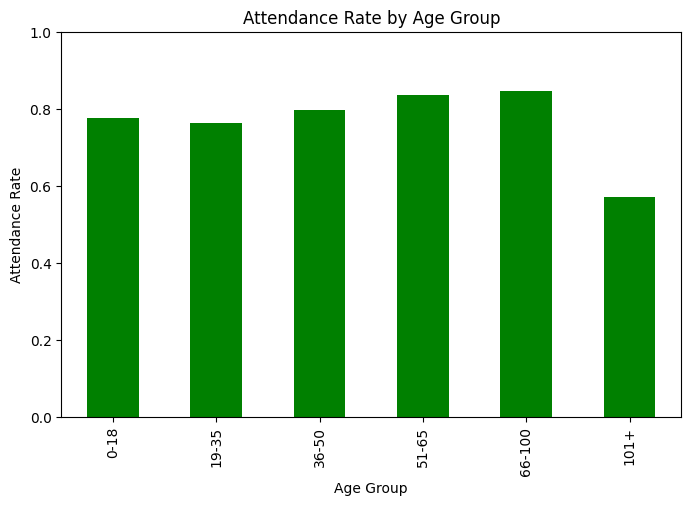

In [53]:
# Plot attendance rate using defined function.

plot_bar(
    age_attendance_rate,
    title="Attendance Rate by Age Group",
    xlabel="Age Group",
    ylabel="Attendance Rate",
    colors='green'
    
)   


### Key Findings:

- The **19-35 age group** has the **lowest attendance rate (76.2%)**,  
  meaning nearly **1 in 4** of them **miss their appointments**.
- Attendance **steadily improves** with age, reaching a **peak (84.5%) in the 66-100 age group**.
- The **101+ age group** has a **sharp drop in attendance (57.1%)**,  
  possibly due to **mobility challenges, difficulty accessing healthcare, or other factors**.

These findings suggest that **younger adults (19-35) are the most likely to miss appointments**,  
while older adults **attend more consistently**—except for the **very oldest patients**.




### 2. Do medical conditions (Hypertension, Diabetes, Alcoholism) impact attendance?

### Calculate no-show rates for each condition
To investigate whether **Hypertension, Diabetes, or Alcoholism** impact appointment attendance,  
we calculate the **average no-show rate** for each condition.

- The `no_show` column is **1 if the patient missed the appointment** and **0 if they attended**.
- Grouping by each medical condition and taking the **mean** gives the **percentage of missed appointments**.

This will help us determine if patients with these conditions are **more or less likely to miss appointments**.

In [54]:
# Define medical condition columns

condition_col = ['hipertension', 'diabetes', 'alcoholism']

# Calculate no-show rates for each medical condition

condition_no_show = df.groupby(condition_col)['no_show'].mean()

print(condition_no_show)

hipertension  diabetes  alcoholism
False         False     False         0.209094
                        True          0.214614
              True      False         0.199855
                        True          0.171053
True          False     False         0.170809
                        True          0.184874
              True      False         0.175762
                        True          0.179688
Name: no_show, dtype: float64


The table above shows the **average no-show rate** for patients based on their medical conditions.  
Each row represents a different combination of **Hypertension, Diabetes, and Alcoholism**.

Next, we visualize these trends.

### Visualizing No-Show Rates for Each Medical Condition

To better understand how **Hypertension, Diabetes, and Alcoholism** impact attendance,  
we will create **separate bar charts** for each condition.

- Instead of plotting all three conditions together (which was hard to interpret),  
  we generate **one bar chart per condition** for **clearer comparisons**.
- Each bar chart will display **the average no-show rate** for patients **with and without** the condition.
- This helps us **identify trends**—for example, whether patients with a condition are more likely to miss appointments.

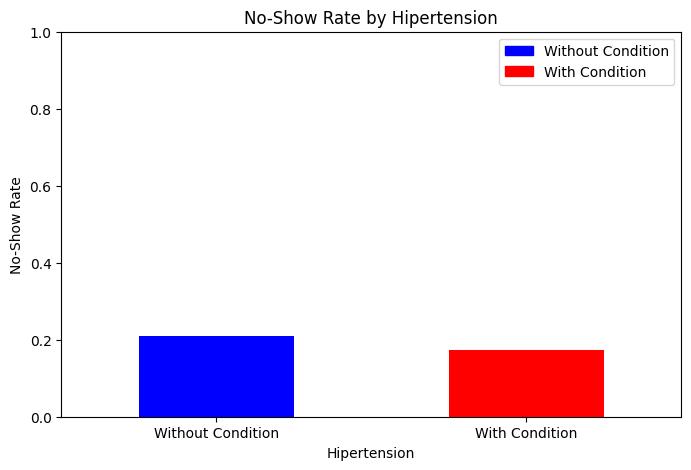

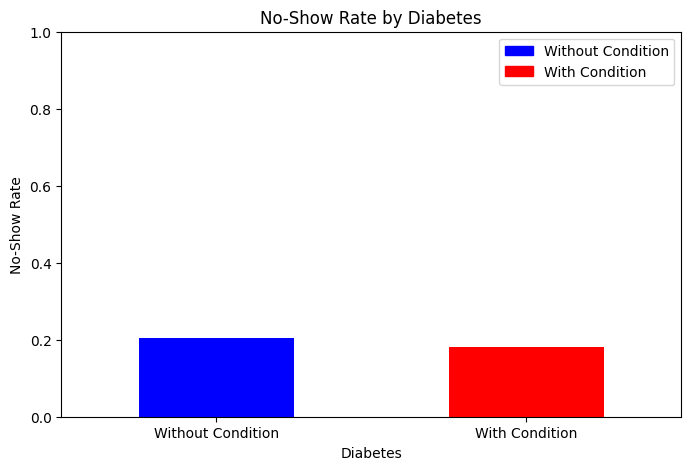

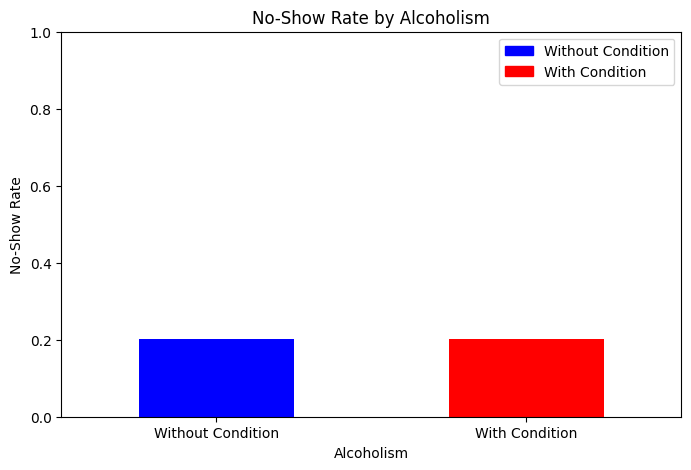

In [55]:
# Loop through each condition and plot its no-show rate using defined function.

for condition in condition_col:
    plot_bar(
        df.groupby(condition)['no_show'].mean(), 
        title=f"No-Show Rate by {condition.capitalize()}", 
        xlabel=condition.capitalize(), 
        ylabel="No-Show Rate",
        labels=["Without Condition", "With Condition"],
        colors=['blue', 'red']
    )


### Key Findings:

- **Hypertension:**  
  - Patients **without Hypertension** had a no-show rate **slightly above 20% (~0.21)**.  
  - Patients **with Hypertension** had a **slightly lower no-show rate (~18%)**.  
  - The **difference is minor**, suggesting Hypertension **does not significantly impact attendance**.

- **Diabetes:**  
  - No-show rates are **very similar** for patients **with and without Diabetes**.  
  - This suggests Diabetes does not have a **strong effect** on appointment attendance.

- **Alcoholism:**  
  - Both groups (patients **with and without Alcoholism**) had no-show rates **around 20%**.  
  - Alcoholism also **does not appear to significantly impact attendance behavior**.


### 3. Does receiving an SMS reminder reduce no-shows?  

 ### Comparing No-Show Rates: SMS Reminder vs. No SMS Reminder
To determine whether **receiving an SMS reminder** reduces no-shows, we calculate the **average no-show rate** for two groups:
- Patients who **did NOT** receive an SMS reminder (`sms_received = 0`)
- Patients who **DID** receive an SMS reminder (`sms_received = 1`)

By comparing the **no-show percentages** for both groups,  
we can assess whether SMS reminders help improve attendance.
 

In [56]:
# Group by SMS received (0 = No, 1 = Yes) and calculate the no-show rate

sms_no_show = df.groupby('sms_received')['no_show'].mean()

print(sms_no_show)

sms_received
0    0.167035
1    0.275745
Name: no_show, dtype: float64


- Patients who **DID NOT** receive an SMS had a no-show rate of **16.7%**.  
- Patients who **DID** receive an SMS had a **higher** no-show rate of **27.6%**.  

This **unexpected result** suggests that **patients who received an SMS were actually more likely to miss their appointment**.  
To explore this further, we visualize the no-show rates.


### Visualizing No-Show Rates for SMS Recipients vs. Non-Recipients

To better understand the impact of SMS reminders on attendance,  
we use a **bar chart** to compare the no-show rates for:
- Patients who **did not** receive an SMS (`sms_received = 0`)
- Patients who **received** an SMS reminder (`sms_received = 1`)


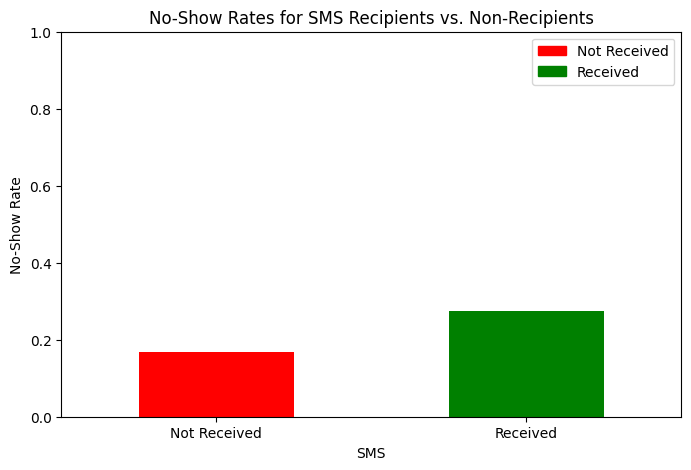

In [57]:
# Plot no-show rates for recipients vs. non-recipients using defined function.

plot_bar(
    sms_no_show,
    title="No-Show Rates for SMS Recipients vs. Non-Recipients",
    xlabel="SMS",
    ylabel="No-Show Rate",
    labels=["Not Received", "Received"],
    colors=['red', 'green']
)


### Key Findings:

- The **no-show rate was higher for patients who received an SMS reminder (27.6%)** compared to those who **did not (16.7%).**  
- This suggests that **receiving an SMS does not necessarily reduce no-shows**.  

- A possible explanation is that **patients who received an SMS may already be more likely to miss their appointments**,  
  so the SMS **does not cause the no-show but rather reflects an existing trend**.


### Distribution of SMS Reminders Sent

Before visualizing SMS reminders, we compute key statistics:
- **Count**: Total number of patients in each SMS group.
- **Mean**: The **average no-show rate** (proportion of missed appointments).
- **Standard Deviation**: The **spread of no-show rates**, showing variability.

This helps us understand **whether SMS reminders significantly impact attendance** before visualizing the distribution.


In [58]:
# Summary Statistics for SMS Reminders

sms_summary = df.groupby('sms_received')['no_show'].agg(['count', 'mean', 'std'])

print(sms_summary)

              count      mean       std
sms_received                           
0             75044  0.167035  0.373010
1             35482  0.275745  0.446895


- **75,044 patients (67.9%) did NOT receive an SMS.**  
- **35,482 patients (32.1%) DID receive an SMS.**  
- **The standard deviation is higher for SMS recipients (`std = 0.45`),**  
  indicating **greater variability in their no-show behavior**.

This suggests that **SMS reminders were not sent to all patients**,  
but instead, they might have been targeted at certain groups.


To further explore how frequently SMS reminders were used,  
we create a **pie chart** showing the proportion of:
- **Appointments where an SMS was received (`sms_received = 1`)**  
- **Appointments where no SMS was sent (`sms_received = 0`)**

In [59]:
# Count SMS reminder

sms_count = df['sms_received'].value_counts()

print(sms_count)

0    75044
1    35482
Name: sms_received, dtype: int64


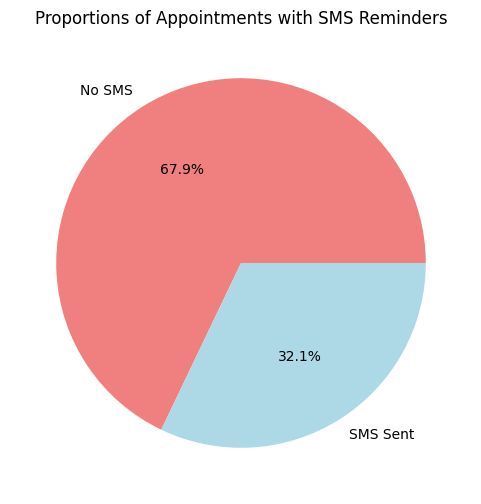

In [60]:
# Create pie chart

plt.figure(figsize=(6, 6))
plt.pie(sms_count, labels=['No SMS', 'SMS Sent'], autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue'])
plt.title("Proportions of Appointments with SMS Reminders")

plt.show()

### Key Findings:
- **67.9% of appointments did NOT receive an SMS reminder** (red section).  
- **Only 32.1% of appointments received an SMS** (blue section).  

This suggests that SMS reminders **were not universally sent**  
and might have been targeted toward **specific patient groups**,  
which could explain why no-show rates were **higher among SMS recipients**.


<a id='conclusions'></a>
## Conclusions

### What Factors Influence No-Shows?

This analysis explored **three key factors** that may influence appointment attendance:  
1️. **Age**  
2️. **Medical Conditions (Hypertension, Diabetes, Alcoholism)**  
3. **Receiving an SMS Reminder**  

### Key Findings

Our analysis revealed that:
- Younger adults (**19-35 age group**) had the lowest attendance rate at (**76.2%**) making them the most likely to miss appointments.  
- Attendance **steadily increased with age**, peaking in the **66-100 age group (84.5%)**.  
- The **101+ age group had a sharp drop (57%)**, possibly due to mobility issues or health barriers.  

- Medical conditions did not have significant impact in no-show rates. Minimal difference was observed for **Hypertension, Diabetes, or Alcoholism**.  
- Patients **with or without these conditions had similar attendance behavior**, suggesting medical conditions alone do not strongly influence no-shows.  

- **Unexpectedly, patients who received an SMS had a higher no-show rate (27.6%)**  
  compared to those who did not receive an SMS (16.7%).  
- This suggests that **SMS reminders were not randomly assigned**—they may have been sent to patients  
  **who were already more likely to miss their appointments** (e.g., those with past no-shows).  
- The pie chart showed that **only 32.1% of patients received an SMS**, further supporting the idea  
  that SMS reminders may have been targeted to certain patient groups.  


### Analysis Limitations

**Correlation, Not Causation**  
- This analysis only identifies **trends**; it does **not** prove that any of these factors **cause** no-shows.  
- For example, while SMS recipients had **higher** no-show rates, we **cannot conclude** that SMS reminders  
  **increase** no-shows—it’s more likely that **patients prone to missing appointments were targeted for reminders**.  

**Lack of Additional Context**  
- The dataset does not include **important behavioral or social factors** that may contribute to no-shows,  
  such as **transportation issues, work conflicts, or patient motivation**.  
- Including these factors could provide a **more comprehensive understanding** of why patients miss appointments.  

**Potential Bias in SMS Reminder Data**  
- Since **not all patients received an SMS reminder**, the no-show rates for SMS recipients may not be **representative**  
  of the entire patient population. Further research is needed to determine **who was selected to receive reminders**.  


### Final Thoughts

This analysis provides **insights into patient attendance patterns** and highlights areas where further investigation is needed.  
While **age is a notable factor**, medical conditions appear **less significant**, and the role of SMS reminders remains **unclear** due to potential selection bias.  

By understanding the patterns behind **missed appointments**, healthcare providers can develop **better strategies**  
to improve patient attendance and overall healthcare efficiency.  


In [61]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 548706 bytes to Investigate_a_Dataset.html
